## BBVA MLP

In [1]:
#Importando librerias
%matplotlib inline
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#mi conjunto
data_train = 'DatasetBBVA/bbva_train.csv'
data_test = 'DatasetBBVA/bbva_train.csv'

#train0 = np.array(pd.read_csv( data,sep=',',header=None))
#train0.shape
#train1 = np.genfromtxt(data, delimiter=',')


In [3]:
train_CSV_File= pd.read_csv(data_train)
train_CSV_File.head()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,53643,201208,1,Rang_ingreso_06,Lima,32.0,8.0,1,Cero,15940,...,3,3,3,3,1,1,1,1,1,1
1,67960,201208,1,Rang_ingreso_03,Lima,25.0,5.0,0,Rango_SDO_02,0,...,5,5,5,4,1,1,1,1,1,1
2,93652,201208,1,Rang_ingreso_02,Lima,35.0,0.0,0,Rango_SDO_01,0,...,1,1,1,1,1,1,1,1,1,1
3,52446,201208,1,Rang_ingreso_03,Lima,32.0,6.0,0,Cero,1670,...,3,3,3,3,1,1,1,1,1,1
4,96645,201208,1,Rang_ingreso_07,Lima,30.0,9.0,0,Rango_SDO_01,2620,...,4,3,3,3,1,1,1,1,1,1


### Get Data

In [4]:
train = pd.read_csv(data_train)
test = pd.read_csv(data_test)
target = train.ATTRITION
train_id = train.ID_CORRELATIVO
test_id = test.ID_CORRELATIVO
train.drop(["ID_CORRELATIVO","ATTRITION"],1,inplace=True)
test.drop("ID_CORRELATIVO",1,inplace= True)

In [5]:
train.head()

,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,201208,1,Rang_ingreso_06,Lima,32.0,8.0,Cero,15940,14530,16880,...,3,3,3,3,1,1,1,1,1,1
1,201208,1,Rang_ingreso_03,Lima,25.0,5.0,Rango_SDO_02,0,0,0,...,5,5,5,4,1,1,1,1,1,1
2,201208,1,Rang_ingreso_02,Lima,35.0,0.0,Rango_SDO_01,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,201208,1,Rang_ingreso_03,Lima,32.0,6.0,Cero,1670,1460,1580,...,3,3,3,3,1,1,1,1,1,1
4,201208,1,Rang_ingreso_07,Lima,30.0,9.0,Rango_SDO_01,2620,2560,950,...,4,3,3,3,1,1,1,1,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 51 columns):
CODMES                       56000 non-null int64
FLG_BANCARIZADO              56000 non-null int64
RANG_INGRESO                 48448 non-null object
FLAG_LIMA_PROVINCIA          53299 non-null object
EDAD                         51719 non-null float64
ANTIGUEDAD                   54579 non-null float64
RANG_SDO_PASIVO_MENOS0       56000 non-null object
SDO_ACTIVO_MENOS0            56000 non-null int64
SDO_ACTIVO_MENOS1            56000 non-null int64
SDO_ACTIVO_MENOS2            56000 non-null int64
SDO_ACTIVO_MENOS3            56000 non-null int64
SDO_ACTIVO_MENOS4            56000 non-null int64
SDO_ACTIVO_MENOS5            56000 non-null int64
FLG_SEGURO_MENOS0            56000 non-null int64
FLG_SEGURO_MENOS1            56000 non-null int64
FLG_SEGURO_MENOS2            56000 non-null int64
FLG_SEGURO_MENOS3            56000 non-null int64
FLG_SEGURO_MENOS4            56000

In [7]:
#Otra forma de hallar la correlación (bajo esta característica de debería sacar el test_set)
train_csv = pd.read_csv(data_train)
corr_matrix = train_csv.corr()
corr_matrix["ATTRITION"].sort_values(ascending=False)

ATTRITION                  1.000000
EDAD                       0.004558
ID_CORRELATIVO             0.003097
SDO_ACTIVO_MENOS3         -0.029459
SDO_ACTIVO_MENOS2         -0.030188
SDO_ACTIVO_MENOS5         -0.030247
SDO_ACTIVO_MENOS1         -0.030803
SDO_ACTIVO_MENOS4         -0.030999
SDO_ACTIVO_MENOS0         -0.031104
NRO_ACCES_CANAL3_MENOS1   -0.031347
NRO_ACCES_CANAL3_MENOS0   -0.053116
FLG_BANCARIZADO           -0.054360
FLG_SDO_OTSSFF_MENOS5     -0.064415
FLG_NOMINA                -0.067474
FLG_SDO_OTSSFF_MENOS4     -0.071433
NRO_ACCES_CANAL3_MENOS2   -0.074465
NRO_ACCES_CANAL2_MENOS1   -0.075961
NRO_ACCES_CANAL2_MENOS0   -0.076798
FLG_SDO_OTSSFF_MENOS3     -0.078318
NRO_ACCES_CANAL2_MENOS5   -0.078530
NRO_ACCES_CANAL2_MENOS4   -0.078825
NRO_ACCES_CANAL2_MENOS2   -0.080535
NRO_ACCES_CANAL2_MENOS3   -0.081850
FLG_SDO_OTSSFF_MENOS2     -0.083846
FLG_SDO_OTSSFF_MENOS1     -0.085176
NRO_ENTID_SSFF_MENOS5     -0.085729
FLG_SDO_OTSSFF_MENOS0     -0.086107
NRO_ENTID_SSFF_MENOS4     -0

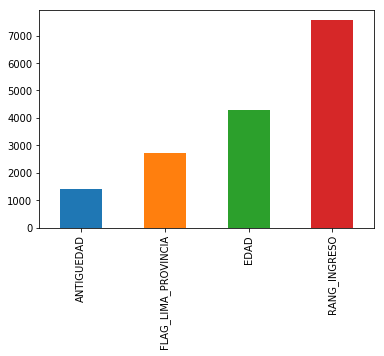

In [8]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
RANG_INGRESO,7552,0.134857
EDAD,4281,0.076446
FLAG_LIMA_PROVINCIA,2701,0.048232
ANTIGUEDAD,1421,0.025375
FLG_SDO_OTSSFF_MENOS5,0,0.000000


### Prepare Data

In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [12]:
#Usando LabelEncoder
from sklearn import preprocessing
for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) )
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
train  

,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,201208,1,5,0,32.0,8.0,0,15940,14530,16880,...,3,3,3,3,1,1,1,1,1,1
1,201208,1,2,0,25.0,5.0,2,0,0,0,...,5,5,5,4,1,1,1,1,1,1
2,201208,1,1,0,35.0,0.0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,201208,1,2,0,32.0,6.0,0,1670,1460,1580,...,3,3,3,3,1,1,1,1,1,1
4,201208,1,6,0,30.0,9.0,1,2620,2560,950,...,4,3,3,3,1,1,1,1,1,1
5,201208,0,1,0,25.0,4.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,201208,0,0,0,NaN,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,201208,1,1,0,30.0,10.0,1,0,0,0,...,5,5,5,5,1,1,1,1,1,1
8,201208,1,3,1,53.0,10.0,1,0,0,0,...,6,6,6,6,1,1,1,1,1,1
9,201208,1,4,0,41.0,9.0,0,0,0,0,...,4,4,4,4,1,1,1,1,1,1


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_attribs = list(train.select_dtypes(include=[np.number])) #Le pasamos los numéricos no llenitos, 
cat_attribs = list(train.select_dtypes(include=[np.object])) #Le pasamos los categóricos no llenitos

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()), #De pasito escalamos valores
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
    ])

In [14]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [15]:
train_prepared = full_pipeline.fit_transform(train)

In [28]:
train_prepared

array([[ 0.        ,  0.43681264,  0.62488212, ...,  0.9289127 ,
         0.93758654,  0.94426493],
       [ 0.        ,  0.43681264, -0.37110658, ...,  0.9289127 ,
         0.93758654,  0.94426493],
       [ 0.        ,  0.43681264, -0.70310281, ...,  0.9289127 ,
         0.93758654,  0.94426493],
       ...,
       [ 0.        ,  0.43681264, -1.03509904, ..., -1.07652742,
         0.93758654,  0.94426493],
       [ 0.        , -2.28931104,  1.95286706, ..., -1.07652742,
        -1.06656821, -1.05902482],
       [ 0.        ,  0.43681264,  0.29288589, ...,  0.9289127 ,
        -1.06656821, -1.05902482]])

In [31]:
train_id.shape

(56000,)

In [32]:
train_prepared.shape

(56000, 51)

### Select Model

#### My NN

In [ ]:
def sigmoid(a):
    return 1.0 / (1 + np.exp(-a))

def init_weight(input_layer, hidden_layer, out_layer):
    w1 = np.random.randn(hidden_layer, input_layer) 
    w2 = np.random.randn(out_layer, hidden_layer )
    return w1,w2

